
# **Assignment - 2: Basic Data Understanding**

---

This assignment will get you familiarized with Python libraries and  functions required for data visualization.

---
## Part 1 - Loading data 
---

###Import the following libraries:  

* ```numpy``` with an alias name ```np```, 
* ```pandas``` with an alias name ```pd```, 
* ```matplotlib.pyplot``` with an alias name ```plt```, and 
* ```seaborn``` with an alias name ```sns```. 

In [55]:
# Load the four libraries with their aliases 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Using the files ```train.csv``` and ```moviesData.csv```,  peform the following:

* Load these file as ```pandas``` dataframes and store it in variables named ```df``` and ```movies``` respectively. 
* Print the first ten rows of ```df```. 



In [56]:
# Load the file as a dataframe 
df = pd.read_csv("train.csv")
movies = pd.read_csv("moviesData.csv")

In [57]:
# Print the first ten rows of df
df[:10]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,1,6,3,3,2,2,2,2,4
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,0,8,2,2,7,7,3,6,5
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,3,12,3,2,1,0,0,0,6
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,1,1,2,3,1,0,0,0,7
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,0,10,2,3,9,7,1,8,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,2,17,3,2,7,7,7,7,9


### Using the dataframe ```df```, perform the following: 

* Print the first five rows of the column ```MonthlyRate```. 
* Find out the details of the column ```MonthlyRate``` like mean, maximum value, minimum value, etc. 

In [58]:
# Print the first five rows of MonthlyRate
df['MonthlyRate'][:5]

0    19479
1    24907
2     2396
3    23159
4    16632
Name: MonthlyRate, dtype: int64

In [59]:
# Find the details of MonthlyRate 
df.MonthlyRate.describe()

count     1028.000000
mean     14243.531128
std       7048.768076
min       2094.000000
25%       8259.750000
50%      14074.500000
75%      20342.250000
max      26999.000000
Name: MonthlyRate, dtype: float64

---
## Part 2 - Cleaning and manipulating data 
---

### Using the dataframe ```df```, peform the following:

* Check whether there are any missing values in ```df```. 
* If yes, drop those values and print the size of ```df``` after dropping these. 

In [60]:
# Check for missing values 
print(df.isna().sum())

# Drop the missing values 
df = df.dropna() 

# Print the size of df after dropping 
df.shape


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
ID        

(1028, 34)

### Using the dataframe ```df```, peform the following:

* Add another column named ```MonthRateNew``` in ```df``` by subtracting the mean from ```MonthlyRate``` and dividing it by standard deviation. 

In [61]:
# Add a column named MonthRateNew 
df['MonthRateNew'] = ( df['MonthlyRate'] - df.MonthlyRate.mean() ) / (df['MonthlyRate'].std())

### Using the dataframe ```movies```, perform the following: 

* Check whether there are any missing values in ```movies```. 
* Find out the number of observations/rows having any of their features/columns missing. 
* Drop the missing values and print the size of ```movies``` after dropping these. 
* Instead of dropping the missing values, replace the missing values by their mean (or some suitable value). 


In [62]:
# Check for missing values 
print(movies.isna().sum())

# Drop the missing values 
movies2 = movies.dropna()
print(movies2.shape)

# Replace the missing values 
# You can use SimpleImputer of sklearn for this
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
movies["runtime"] = imp.fit_transform(movies[["runtime"]]).ravel()
movies["studio"] = imp.fit_transform(movies[["studio"]]).ravel()
movies["dvd_rel_year"] = imp.fit_transform(movies[["dvd_rel_year"]]).ravel()
movies["dvd_rel_month"] = imp.fit_transform(movies[["dvd_rel_month"]]).ravel()
movies["dvd_rel_day"] = imp.fit_transform(movies[["dvd_rel_day"]]).ravel()
movies["director"] = imp.fit_transform(movies[["director"]]).ravel()
movies["actor1"] = imp.fit_transform(movies[["actor1"]]).ravel()
movies["actor2"] = imp.fit_transform(movies[["actor2"]]).ravel()
movies["actor3"] = imp.fit_transform(movies[["actor3"]]).ravel()
movies["actor4"] = imp.fit_transform(movies[["actor4"]]).ravel()
movies["actor5"] = imp.fit_transform(movies[["actor5"]]).ravel()


Unnamed: 0           0
title                0
title_type           0
genre                0
runtime              1
mpaa_rating          0
studio               5
thtr_rel_year        0
thtr_rel_month       0
thtr_rel_day         0
dvd_rel_year         7
dvd_rel_month        7
dvd_rel_day          7
imdb_rating          0
imdb_num_votes       0
critics_rating       0
critics_score        0
audience_rating      0
audience_score       0
best_pic_nom         0
best_pic_win         0
best_actor_win       0
best_actress_win     0
best_dir_win         0
top200_box           0
director             2
actor1               2
actor2               7
actor3               9
actor4              12
actor5              14
dtype: int64
(572, 31)


ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'Indomina Media Inc.'

---
## Part 3 - Visualizing data 
---

### Visualize the ```df``` by drawing the following plots:

* Plot a histogram of ```Age``` and find the range in which most people are there. 
* Modify the histogram of ```Age``` by adding 30 bins. 
* Draw a scatter plot between ```Age``` and ```Attrition``` and suitable labels to the axes. Find out whether people more than 50 years are more likely to leave the company. (```Attrition``` = 1 means people have left the company). 

(array([ 46.,  76., 157., 179., 177., 144.,  84.,  67.,  60.,  38.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <a list of 10 Patch objects>)

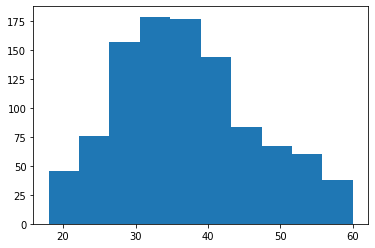

In [63]:
# Plot and modify the histogram of Age
plt.hist(df.Age)

(array([15.,  9., 22.,  7., 17., 52., 36., 75., 46., 45., 83., 51., 99.,
        41., 37., 59., 29., 56., 21., 27., 36., 12., 37., 18., 17., 27.,
        16., 13., 11., 14.]),
 array([18. , 19.4, 20.8, 22.2, 23.6, 25. , 26.4, 27.8, 29.2, 30.6, 32. ,
        33.4, 34.8, 36.2, 37.6, 39. , 40.4, 41.8, 43.2, 44.6, 46. , 47.4,
        48.8, 50.2, 51.6, 53. , 54.4, 55.8, 57.2, 58.6, 60. ]),
 <a list of 30 Patch objects>)

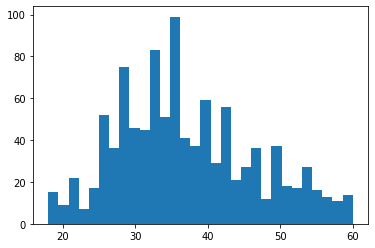

In [64]:
plt.hist(df.Age, bins = 30)

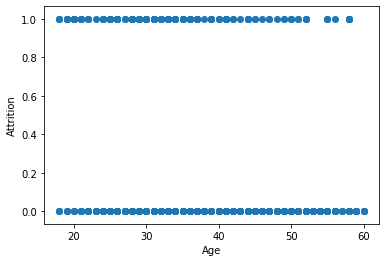

In [65]:
# Draw a scatter plot between Age and Attrition
plt.xlabel('Age')
plt.ylabel('Attrition')
plt.scatter(df.Age, df.Attrition)
# Seems like more than 50 age are less likely to leave the company

### Visualize the ```df``` by following the steps given below:

* Get a series containing counts of unique values of ```Attrition```.
* Draw a countplot for ```Attrition``` using ```sns.countplot()```. 

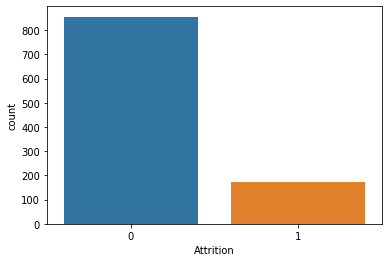

In [66]:
df.Attrition.value_counts()

# Draw a countplot for Attrition 
# You may use countplot of seaborn for this 

sns.countplot(df.Attrition)

### Visualize the ```df``` by following the steps given below:

* Draw a cross tabulation of ```Attrition``` and ```BusinessTravel``` as bar charts. Find which value of ```BusinessTravel``` has highest number of people.

Travel_Rarely        729
Travel_Frequently    197
Non-Travel           102
Name: BusinessTravel, dtype: int64

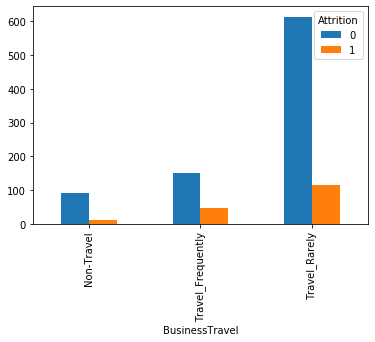

In [67]:
# Draw a cross tab of Attritiona and BusinessTravel 
# You may use crosstab of pandas for this 
pd.crosstab(df.BusinessTravel,df.Attrition).plot(kind='bar')
df.BusinessTravel.value_counts()

### Visualize the ```df``` by drawing the following plot:

* Draw a stacked bar chart between ```Attrition``` and ```Gender``` columns. 

Text(0, 0.5, 'Number of Attritions')

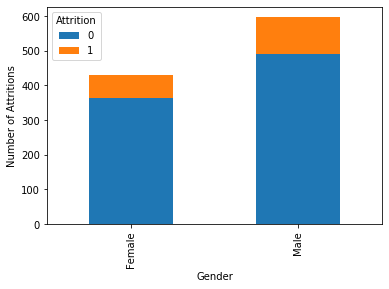

In [68]:
# Draw a stacked bar chart between Attrition and Gender 
t = pd.crosstab(df.Gender,df.Attrition)
t.plot(kind='bar', stacked=True)
plt.ylabel('Number of Attritions')

### Visualize the ```df``` by drawing the following histogram:

* Draw a histogram of ```TotalWorkingYears``` with 30 bins. 
* Draw a histogram of ```YearsAtCompany``` with 30 bins and find whether the values in ```YearsAtCompany``` are skewed. 

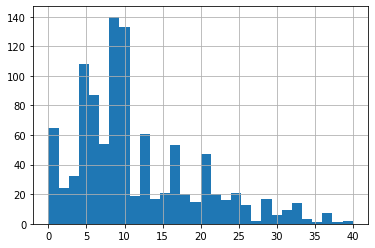

In [69]:
# Draw a histogram of TotalWorkingYears with 30 bins
df["TotalWorkingYears"].hist(bins=30)

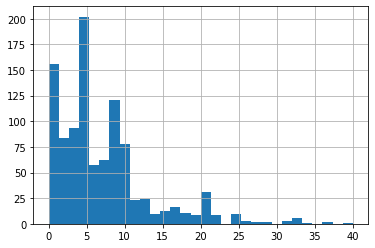

In [70]:
# Draw a histogram of YearsAtCompany
df["YearsAtCompany"].hist(bins=30)
# Values in YearsAtCompany do seem to be skewed in 0-10 years range

### Visualize the ```df``` by drawing the following boxplot:

* Draw a boxplot of ```MonthlyIncome``` for each ```Department``` and report whether there is/are outlier(s). 


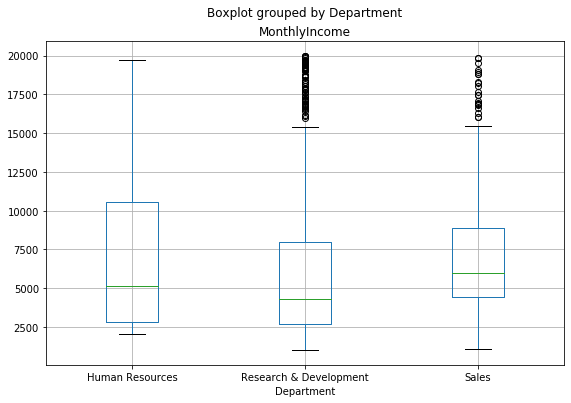

In [71]:
# Draw a boxplot of MonthlyIncome for each Department and report outliers
df.boxplot(column = "MonthlyIncome", by="Department", figsize = (9,6))

### Visualize the ```df``` by drawing the following piechart:

* Create a pie chart of the values in ```JobRole``` with suitable label and report which role has highest number of persons. 

([<matplotlib.patches.Wedge at 0x7f7066113d00>,
 [Text(0.8542961340812947, 0.6929488547459725, 'Sales Executive'),
  Text(-0.45945693362420414, 0.9994495115535571, 'Research Scientist'),
  Text(-1.0981462091349679, -0.06383496974620964, 'Laboratory Technician'),
  Text(-0.6503653604759383, -0.8871442373667334, 'Manufacturing Director'),
  Text(-0.05712202505487643, -1.0985158507065933, 'Healthcare Representative'),
  Text(0.47770465248811617, -0.9908573383647155, 'Manager'),
  Text(0.841447151537986, -0.708496077031207, 'Research Director'),
  Text(1.03505987357499, -0.37235877606808926, 'Sales Representative'),
  Text(1.09597534812125, -0.0940108308148859, 'Human Resources')])

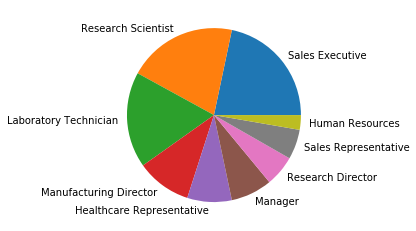

In [72]:
# Create a piechart of JobRole 
# You will need to find the counts of unique values in JobRole. 
temp = df.JobRole.value_counts()
plt.pie(temp, labels=temp.index.tolist())